In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
def read_root_file(root_file_path):
    with uproot.open(root_file_path) as root_file:
        marley_generator_tree = root_file["marley_generator_tree"]
        event_tree = root_file["event_tree"]
        hit_tree = root_file["hit_tree"]
        arrival_photons_tree = root_file["arrival_photons_tree"]

        total_optical_photons = event_tree["total_optical_photons"].array()
        total_thermal_electrons = event_tree["total_thermal_electrons"].array()
        #sensor_arrival_times = arrival_photons_tree["sensor_arrival_times"].array()
        sensor_count = arrival_photons_tree["sensor_count"].array()
        marley_neutrino_energy = marley_generator_tree["marley_generator_neutrino_energy"].array()

        return marley_neutrino_energy, total_optical_photons, total_thermal_electrons, sensor_count

In [4]:
root_file_path = "/home/lane/Software/src/lumilar/system/data/marley_unif.root"
marley_neutrino_energy, total_optical_photons, total_thermal_electrons, sensor_count = read_root_file(root_file_path)

marley_neutrino_energy_np = np.asarray(marley_neutrino_energy)
total_optical_photons_np = np.asarray(total_optical_photons)
total_thermal_electrons_np = np.asarray(total_thermal_electrons)

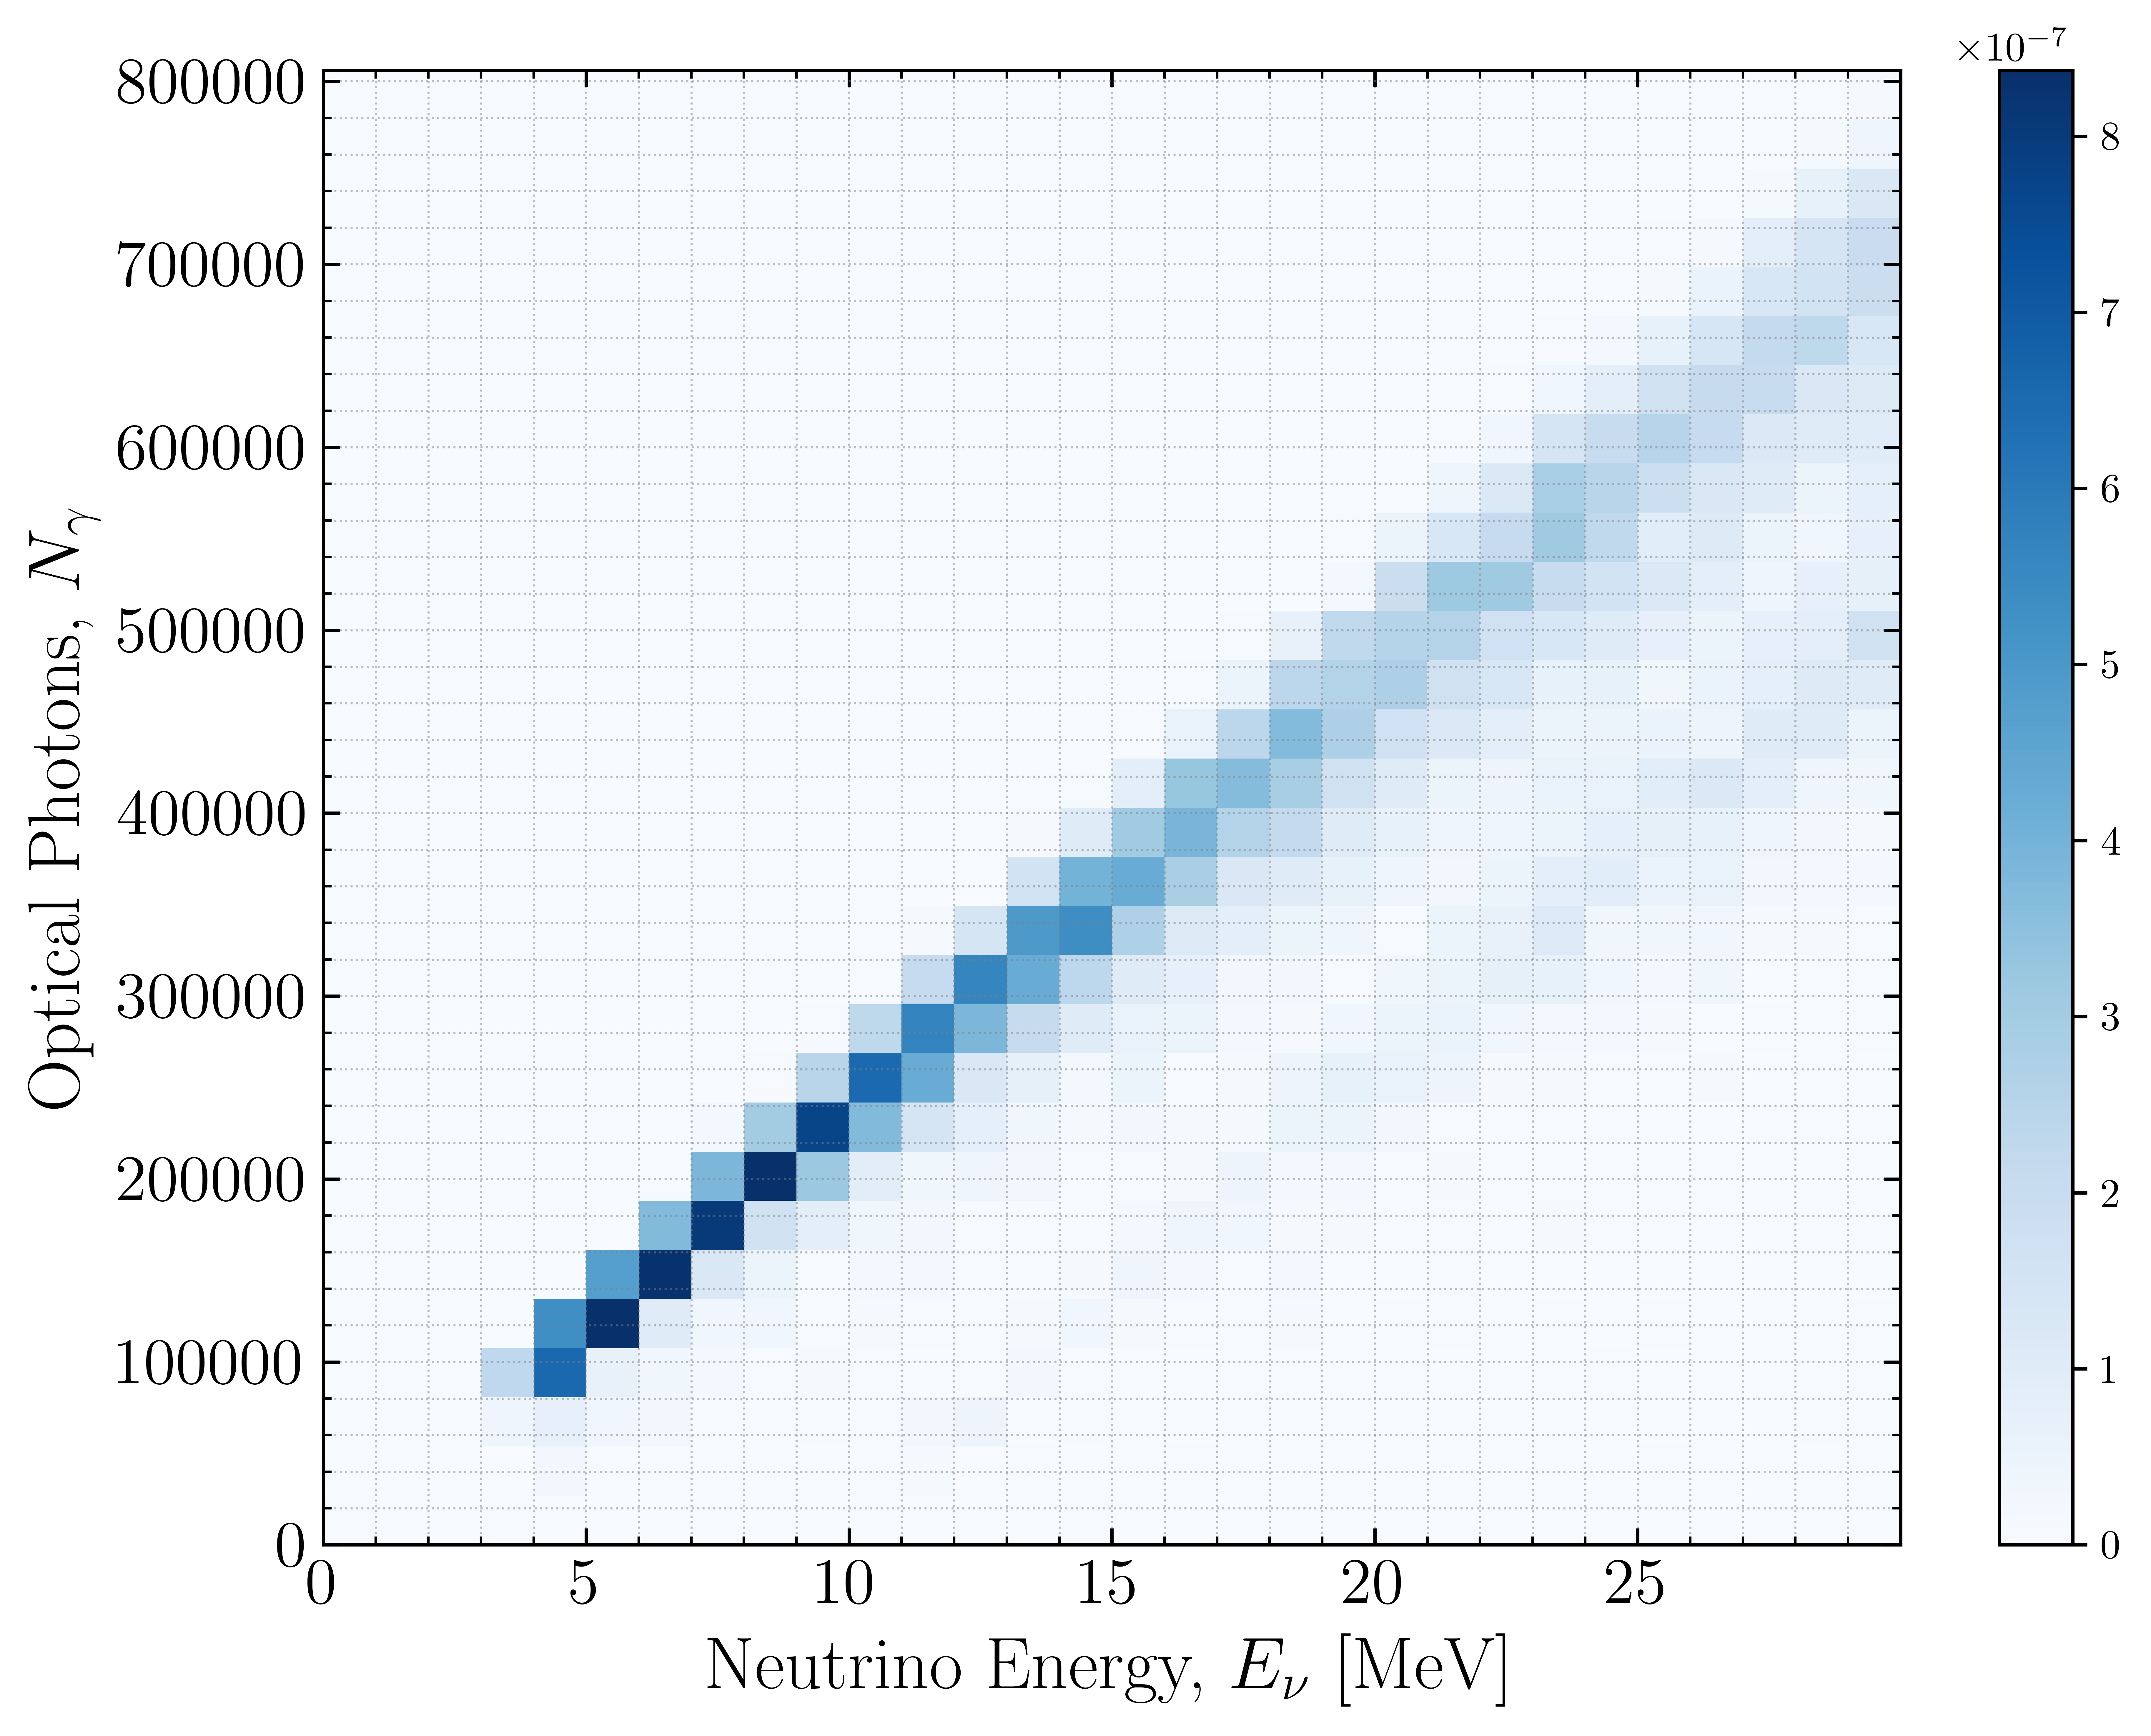

In [8]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=1000)

mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rc('text', usetex=True)

fsize = 18

obsx = marley_neutrino_energy_np
obsy = total_optical_photons_np

xlabel = r'Neutrino Energy, $E_{\nu}$ [MeV]'
ylabel = r'Optical Photons, $N_{\gamma}$'

xrange = [np.min(obsx),np.max(obsx)]
yrange = [np.min(obsy),np.max(obsy)]

H, xedges, yedges, image = ax.hist2d(obsx, obsy, bins=30, cmap="Blues", density=True)

cbar_R = fig.colorbar(image, ax=ax)

ax.set_xlabel(xlabel,fontsize=fsize)
ax.set_ylabel(ylabel,fontsize=fsize)

ax.tick_params(which='both', direction='in', top=True, right=True, length=4)
ax.tick_params(which='minor', length=2)
ax.tick_params(labelsize=fsize-2)
ax.minorticks_on()

ax.grid(which='both', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)

plt.tight_layout()
plt.show()


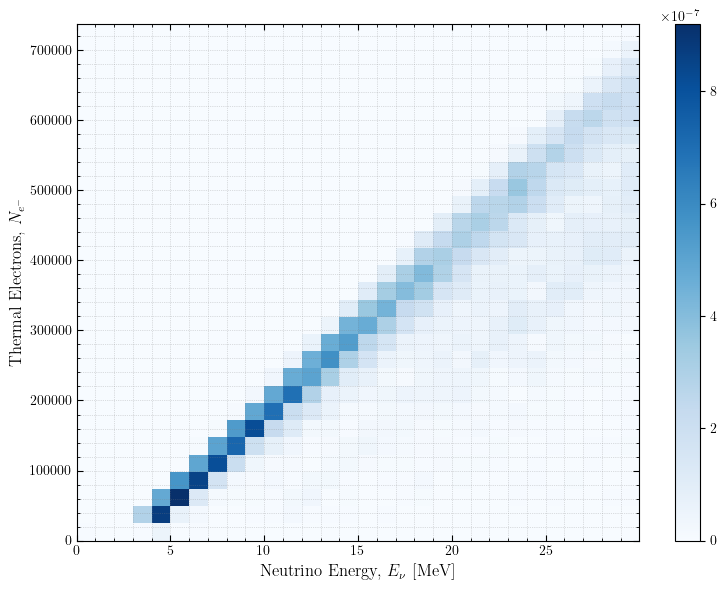

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rc('text', usetex=True)

fsize = 12

obsx = marley_neutrino_energy_np
obsy = total_thermal_electrons_np

xlabel = r'Neutrino Energy, $E_{\nu}$ [MeV]'
ylabel = r'Thermal Electrons, $N_{e^{-}}$'

xrange = [np.min(obsx),np.max(obsx)]
yrange = [np.min(obsy),np.max(obsy)]

H, xedges, yedges, image = ax.hist2d(obsx, obsy, bins=30, cmap="Blues", density=True)

cbar_R = fig.colorbar(image, ax=ax)

ax.set_xlabel(xlabel,fontsize=fsize)
ax.set_ylabel(ylabel,fontsize=fsize)

ax.tick_params(which='both', direction='in', top=True, right=True, length=4)
ax.tick_params(which='minor', length=2)
ax.minorticks_on()

ax.grid(which='both', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)

plt.tight_layout()
plt.show()


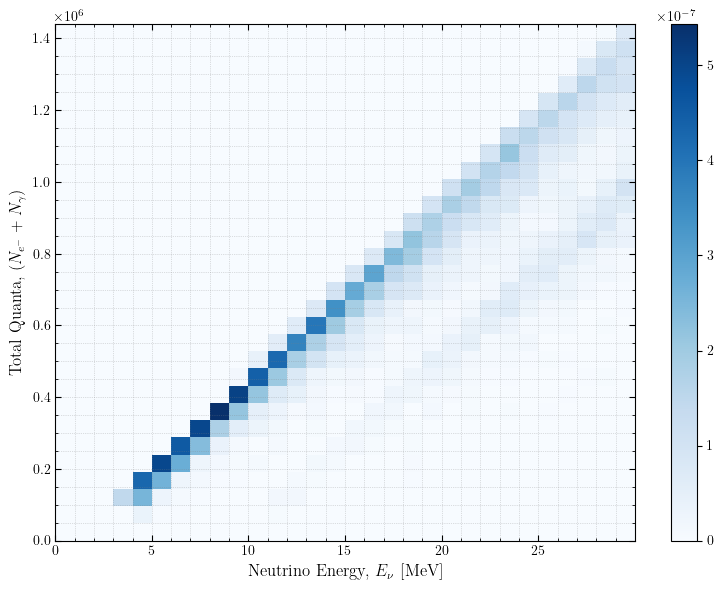

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rc('text', usetex=True)

fsize = 12

obsx = marley_neutrino_energy_np
obsy = total_thermal_electrons_np + total_optical_photons_np

xlabel = r'Neutrino Energy, $E_{\nu}$ [MeV]'
ylabel = r'Total Quanta, $(N_{e^{-}}+N_{\gamma})$'

xrange = [np.min(obsx),np.max(obsx)]
yrange = [np.min(obsy),np.max(obsy)]

H, xedges, yedges, image = ax.hist2d(obsx, obsy, bins=30, cmap="Blues", density=True)

cbar_R = fig.colorbar(image, ax=ax)

ax.set_xlabel(xlabel,fontsize=fsize)
ax.set_ylabel(ylabel,fontsize=fsize)

ax.tick_params(which='both', direction='in', top=True, right=True, length=4)
ax.tick_params(which='minor', length=2)
ax.minorticks_on()

ax.grid(which='both', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)

plt.tight_layout()
plt.show()
